# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




# Google Stock Data | RNN




### Data Import & Inspecting

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
# open Price
training_set = dataset_train.iloc[:,1:2].values
training_set


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# preprocessing Data

### preprocessing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))

In [ ]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
training_set_scaled.shape

(1258, 1)

Selecting Data

In [ ]:
X_train = []
y_train = []

for i in range(60,len(training_set_scaled )):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [ ]:
X_train , y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape # 60 feature

(1198, 60)

# Reshape

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
y_train.shape

(1198,)

## Model & Building & Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train,epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 15s 164ms/step - loss: 0.0395
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0065
Epoch 6/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 6s 172ms/step - loss: 0.0043
Epoch 13/100

# Model Evaluation

### preparing Data

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs # the lasr 60 values will help to predict the next values


array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs.shape

(80, 1)

In [ ]:
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

In [ ]:
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [ ]:
X_test.shape

(20, 60, 1)

# Evaluating Model

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

1/1 [==============================] - 2s 2s/step


array([[0.93441725],
       [0.9293225 ],
       [0.92930686],
       [0.93169236],
       [0.9376291 ],
       [0.9481532 ],
       [0.9582059 ],
       [0.962849  ],
       [0.96388113],
       [0.96359897],
       [0.96323   ],
       [0.96286607],
       [0.96263766],
       [0.96358943],
       [0.9653183 ],
       [0.97331434],
       [0.985717  ],
       [0.9993765 ],
       [1.007444  ],
       [1.0012368 ]], dtype=float32)

In [ ]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[781.4253 ],
       [778.6866 ],
       [778.67816],
       [779.9605 ],
       [783.15186],
       [788.80927],
       [794.21313],
       [796.7091 ],
       [797.2639 ],
       [797.11224],
       [796.9139 ],
       [796.71826],
       [796.59546],
       [797.1071 ],
       [798.0365 ],
       [802.33484],
       [809.002  ],
       [816.34485],
       [820.6816 ],
       [817.34485]], dtype=float32)

In [ ]:

RMSE

ValueError: ignored

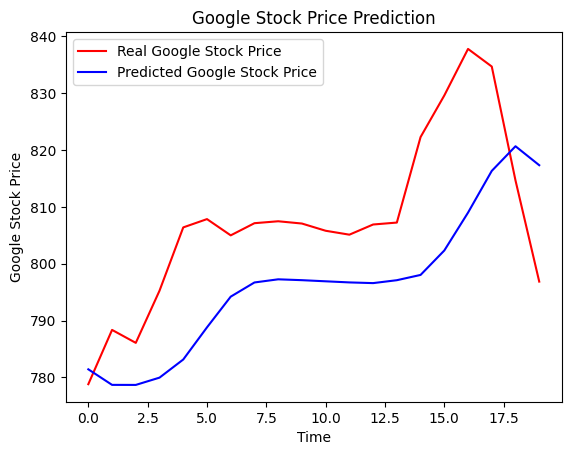

In [ ]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()